# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
#print(list(lat_lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

print(cities)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

['edinburgh of the seven seas', 'argo', 'tocopilla', 'blackmans bay', 'ushuaia', 'yellowknife', 'port-aux-francais', 'amursk', 'dwarka', 'mtwara', 'vigan', 'olgii', 'bredasdorp', 'ancud', 'ribeira grande', 'isafjordur', 'kelaat mgouna', 'theniet el had', 'vorgashor', 'oum hadjer', 'albany', 'lensk', 'adamstown', 'puerto baquerizo moreno', 'lihue', 'udachny', 'devinuwara', 'roma', 'jamestown', 'stanley', 'happy valley-goose bay', 'mrakovo', 'carnarvon', 'fortuna', 'acarau', 'iqaluit', 'afaahiti', 'valparaiso', 'port mathurin', 'tiksi', 'bilibino', 'tofol', 'oriximina', 'avarua', 'dudinka', 'anadyr', 'bethel', 'hawaiian paradise park', 'la sarre', 'whitehorse', 'new norfolk', 'waitangi', 'vanersborg', 'port alfred', 'shaowu', 'khandyga', 'grytviken', 'klyuchi', 'lompoc', 'pisco', 'arraial do cabo', 'howrah', 'kupang', 'punta arenas', 'chonchi', 'copiapo', 'tura', 'kamyshin', 'chulym', 'island harbour', 'port elizabeth', 'amga', 'chelak', 'iskateley', 'soio', 'cobija', 'kerikeri', 'noshir

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [115]:
# test to call weather api for some small sample cities from the whole list to get the json data structure for later loop.
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" 
test_city = ['nelson bay', 'portland']
for city in test_city:
    query_url = url + weather_api_key + '&q=' + city
    response = requests.get(query_url).json()
print(json.dumps(response, indent = 2))    

{
  "coord": {
    "lon": -122.6762,
    "lat": 45.5234
  },
  "weather": [
    {
      "id": 803,
      "main": "Clouds",
      "description": "broken clouds",
      "icon": "04d"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 21.1,
    "feels_like": 21.22,
    "temp_min": 19.44,
    "temp_max": 22.77,
    "pressure": 1016,
    "humidity": 75,
    "sea_level": 1016,
    "grnd_level": 1015
  },
  "visibility": 10000,
  "wind": {
    "speed": 1.34,
    "deg": 285,
    "gust": 3.58
  },
  "clouds": {
    "all": 83
  },
  "dt": 1719713850,
  "sys": {
    "type": 2,
    "id": 2008548,
    "country": "US",
    "sunrise": 1719663897,
    "sunset": 1719720203
  },
  "timezone": -25200,
  "id": 5746545,
  "name": "Portland",
  "cod": 200
}


In [116]:
#test
print(response["coord"]["lat"]) 
print(response["coord"]["lon"])  
print(response['main']["temp_max"]) 
print(response['main']["humidity"])  
print(response["clouds"]['all'])  
print(response['wind']['speed'])  
print(response['sys']['country'])  
print(response['dt'])  

45.5234
-122.6762
22.77
75
83
1.34
US
1719713850


In [117]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" 
# YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval... ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + weather_api_key + '&q=' + city
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
         

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]  
        city_lng = city_weather["coord"]["lon"]  
        city_max_temp = city_weather['main']["temp_max"] 
        city_humidity = city_weather['main']["humidity"]  
        city_clouds = city_weather['clouds']['all']  
        city_wind = city_weather['wind']['speed']  
        city_country = city_weather['sys']['country']  
        city_date = city_weather['dt']  

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval... 
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | argo
Processing Record 3 of Set 1 | tocopilla
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | amursk
Processing Record 9 of Set 1 | dwarka
Processing Record 10 of Set 1 | mtwara
Processing Record 11 of Set 1 | vigan
Processing Record 12 of Set 1 | olgii
City not found. Skipping...
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | kelaat mgouna
City not found. Skipping...
Processing Record 18 of Set 1 | theniet el had
Processing Record 19 of Set 1 | vorgashor
Processing Record 20 of Set 1 | oum hadjer
Processing Record 21 of Set 1 | a

Processing Record 37 of Set 4 | kenora
Processing Record 38 of Set 4 | saipan
Processing Record 39 of Set 4 | port glaud
City not found. Skipping...
Processing Record 40 of Set 4 | warwick
Processing Record 41 of Set 4 | vilyuysk
Processing Record 42 of Set 4 | beyla
Processing Record 43 of Set 4 | ust-nera
Processing Record 44 of Set 4 | el fula
City not found. Skipping...
Processing Record 45 of Set 4 | naze
Processing Record 46 of Set 4 | tazovsky
Processing Record 47 of Set 4 | sisimiut
Processing Record 48 of Set 4 | thinadhoo
Processing Record 49 of Set 4 | toliara
Processing Record 0 of Set 5 | ust'-kulom
Processing Record 1 of Set 5 | puerto ayora
Processing Record 2 of Set 5 | at taj
Processing Record 3 of Set 5 | yallahs
Processing Record 4 of Set 5 | axim
Processing Record 5 of Set 5 | idri
Processing Record 6 of Set 5 | maqat
Processing Record 7 of Set 5 | kletnya
Processing Record 8 of Set 5 | jianguang
Processing Record 9 of Set 5 | chengzhong
Processing Record 10 of Set 

Processing Record 27 of Set 8 | macau
Processing Record 28 of Set 8 | hadibu
Processing Record 29 of Set 8 | kibondo
Processing Record 30 of Set 8 | marsh harbour
Processing Record 31 of Set 8 | ocean city
Processing Record 32 of Set 8 | zwedru
Processing Record 33 of Set 8 | olyokminsk
Processing Record 34 of Set 8 | nurota
Processing Record 35 of Set 8 | egilsstadir
Processing Record 36 of Set 8 | isla vista
Processing Record 37 of Set 8 | atafu village
Processing Record 38 of Set 8 | gowurdak
Processing Record 39 of Set 8 | general conesa
Processing Record 40 of Set 8 | mega
Processing Record 41 of Set 8 | masterton
Processing Record 42 of Set 8 | whyalla stuart
City not found. Skipping...
Processing Record 43 of Set 8 | tralee
Processing Record 44 of Set 8 | gazojak
Processing Record 45 of Set 8 | robertsport
Processing Record 46 of Set 8 | verkhniy tagil
Processing Record 47 of Set 8 | arar
Processing Record 48 of Set 8 | bintulu
Processing Record 49 of Set 8 | geraldton
Processin

Processing Record 14 of Set 12 | promyshlennaya
Processing Record 15 of Set 12 | tyukhtet
Processing Record 16 of Set 12 | sagua la grande
Processing Record 17 of Set 12 | jeddah
Processing Record 18 of Set 12 | baidoa
Processing Record 19 of Set 12 | karagay
Processing Record 20 of Set 12 | boda
Processing Record 21 of Set 12 | moree
Processing Record 22 of Set 12 | mil'kovo
Processing Record 23 of Set 12 | puerto armuelles
Processing Record 24 of Set 12 | karratha
Processing Record 25 of Set 12 | kohlu
Processing Record 26 of Set 12 | guercif
Processing Record 27 of Set 12 | rifle
Processing Record 28 of Set 12 | surab
Processing Record 29 of Set 12 | lerwick
Processing Record 30 of Set 12 | glace bay
Processing Record 31 of Set 12 | luderitz
Processing Record 32 of Set 12 | camocim
Processing Record 33 of Set 12 | bougouni
Processing Record 34 of Set 12 | novaya igirma
Processing Record 35 of Set 12 | mejit
Processing Record 36 of Set 12 | casa grande
Processing Record 37 of Set 12 

In [118]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [119]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,15.27,88,100,14.40,SH,1719713912
1,argo,37.6333,22.7333,24.88,45,0,2.48,GR,1719713913
2,tocopilla,-22.0920,-70.1979,17.99,62,1,2.46,CL,1719713914
3,blackmans bay,-43.0167,147.3167,6.96,90,100,0.45,AU,1719713916
4,ushuaia,-54.8000,-68.3000,-3.19,74,0,2.06,AR,1719713917


In [120]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [121]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.27,88,100,14.40,SH,1719713912
1,argo,37.6333,22.7333,24.88,45,0,2.48,GR,1719713913
2,tocopilla,-22.0920,-70.1979,17.99,62,1,2.46,CL,1719713914
3,blackmans bay,-43.0167,147.3167,6.96,90,100,0.45,AU,1719713916
4,ushuaia,-54.8000,-68.3000,-3.19,74,0,2.06,AR,1719713917


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [122]:
#check df's data types:
print(city_data_df.dtypes)

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object


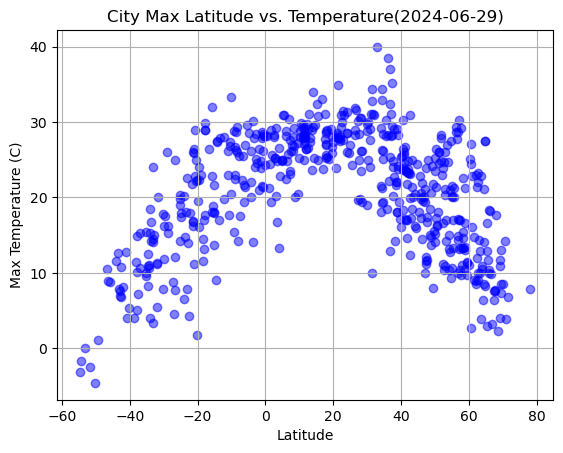

In [124]:
# Build scatter plot for latitude vs. temperature
 
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', color = 'b', alpha = 0.5)
# Incorporate the other graph properties
 
plt.title('City Max Latitude vs. Temperature(2024-06-29)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

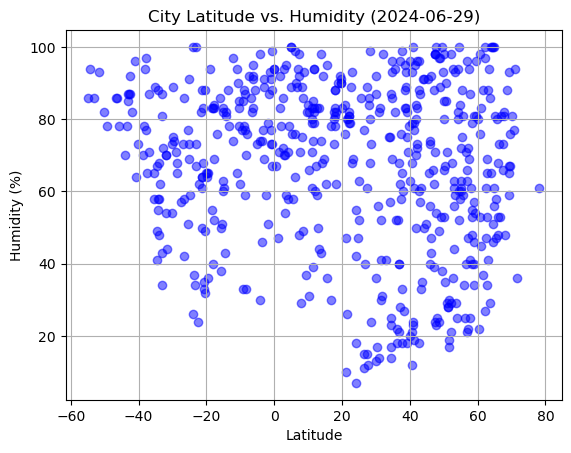

In [47]:
# Build the scatter plots for latitude vs. humidity
 
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', color = 'b', alpha = 0.5)

# Incorporate the other graph properties
 
plt.title('City Latitude vs. Humidity (2024-06-29)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

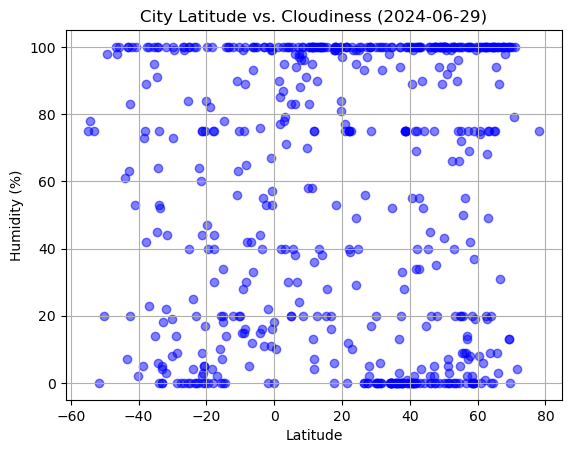

In [48]:
# Build the scatter plots for latitude vs. cloudiness
 
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', color = 'b', alpha = 0.5)

# Incorporate the other graph properties
 
plt.title('City Latitude vs. Cloudiness (2024-06-29)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

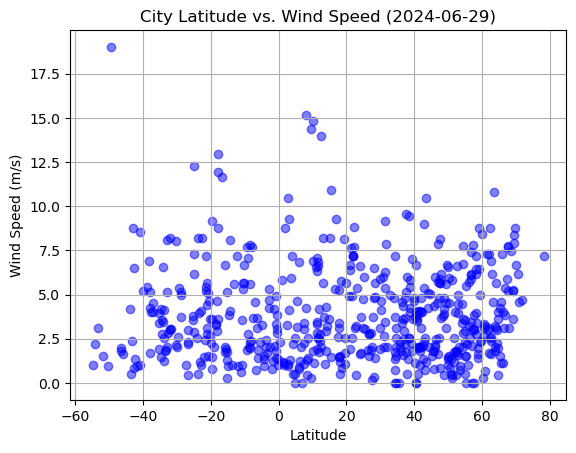

In [49]:
# Build the scatter plots for latitude vs. wind speed
 
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', color = 'b', alpha = 0.5)

# Incorporate the other graph properties
 
plt.title('City Latitude vs. Wind Speed (2024-06-29)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [125]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.27,88,100,14.40,SH,1719713912
1,argo,37.6333,22.7333,24.88,45,0,2.48,GR,1719713913
2,tocopilla,-22.0920,-70.1979,17.99,62,1,2.46,CL,1719713914
3,blackmans bay,-43.0167,147.3167,6.96,90,100,0.45,AU,1719713916
4,ushuaia,-54.8000,-68.3000,-3.19,74,0,2.06,AR,1719713917
...,...,...,...,...,...,...,...,...,...
555,lospalos,-8.5186,127.0025,26.33,70,98,6.37,TL,1719714701
556,fayroz koh,34.5195,65.2509,19.23,40,0,0.64,AF,1719714702
557,aioun,16.6614,-9.6149,33.11,22,4,5.33,MR,1719714703


In [77]:
# Define a function to create Linear Regression plots
 

def linear_regression_func_for_plotting(x_val, y_val, annotation_loc = None): #creating lg function takes 3 parameters, x,y and the annotation location can be self choosed.
    #peform linear regression using scipy.stats
    slope, intercept, r_value, p_value, stderr = linregress(x_val, y_val)
    # calculate regression value
    regression_value = slope*x_val + intercept
    #plotting 
    plt.scatter(x_val, y_val)
    plt.plot(x_val, regression_value, color = 'red')
    equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept,2))
    #plcae the annotaion of the equation
    plt.annotate(equation,xy=(annotation_loc), xycoords='axes fraction', fontsize = 15, color= 'red')
    #print the r squared value
    print(f"The r^2-value is: {r_value**2} ")
    

In [126]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
 
Northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] >= 0, :] #select lat all >= 0
 
# Display sample data
Northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,argo,37.6333,22.7333,24.88,45,0,2.48,GR,1719713913
5,yellowknife,62.4560,-114.3525,21.34,49,40,6.17,CA,1719713918
7,amursk,50.2261,136.8994,17.28,66,100,4.40,RU,1719713921
8,dwarka,22.2394,68.9678,29.31,86,97,7.87,IN,1719713922
10,vigan,17.5747,120.3869,31.07,84,58,1.25,PH,1719713924


In [127]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
 
Southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0, :] #select all lat < 0

# Display sample data
Southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.27,88,100,14.40,SH,1719713912
2,tocopilla,-22.0920,-70.1979,17.99,62,1,2.46,CL,1719713914
3,blackmans bay,-43.0167,147.3167,6.96,90,100,0.45,AU,1719713916
4,ushuaia,-54.8000,-68.3000,-3.19,74,0,2.06,AR,1719713917
6,port-aux-francais,-49.3500,70.2167,1.10,67,97,16.57,TF,1719713919


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.4287911495057167 


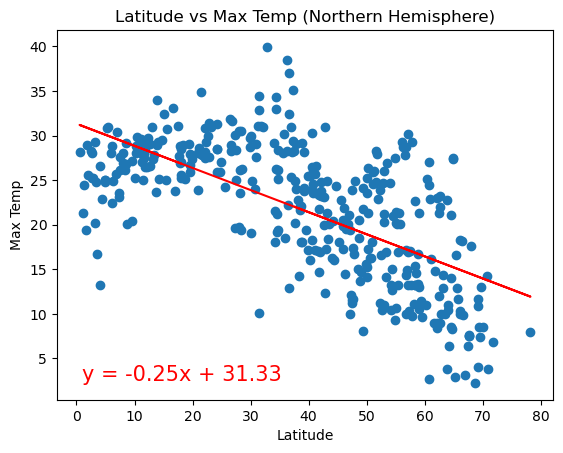

In [128]:
# Linear regression on Northern Hemisphere
 
x = Northern_hemisphere_df['Lat']
y = Northern_hemisphere_df['Max Temp']
linear_regression_func_for_plotting(x, y, (0.05,0.05))
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r^2-value is: 0.5987816059560588 


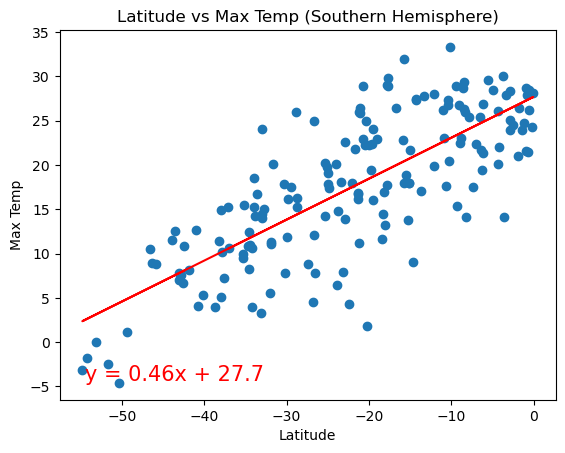

In [129]:
# Linear regression on Southern Hemisphere
 
x_2 = Southern_hemisphere_df['Lat']
y_2 = Southern_hemisphere_df['Max Temp']
linear_regression_func_for_plotting(x_2, y_2, (0.05,0.05))
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:
    
    As we can see from both the North and South regression plot, both graph shows evident correlation between latitude and max temperature, but the Northern is less evient compared with South as the lower R value. As the Northern hemisphere we can see that as the latitudes increase the max temperature 
    shows down trending, which means higher lat the lower max temp. On contrary, in Southern hemisphere, as the lat increase,
    the max temp increase as well. positivive correlation between the dependent and independent varibale.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.013105710295457165 


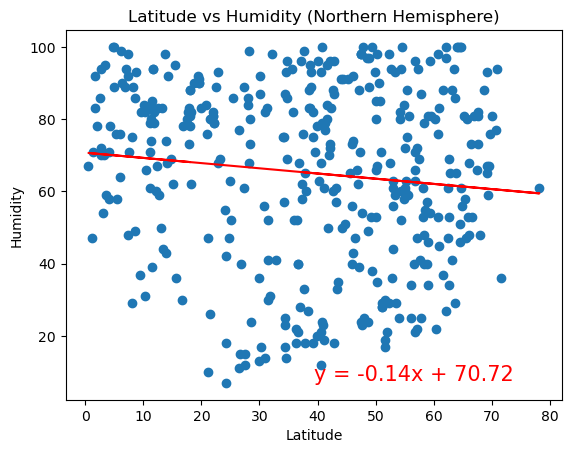

In [83]:
# Northern Hemisphere
 
x_n = Northern_hemisphere_df['Lat']
y_n = Northern_hemisphere_df['Humidity']
linear_regression_func_for_plotting(x_n, y_n, (0.5,0.05))
plt.title('Latitude vs Humidity (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r^2-value is: 0.0002861024247031451 


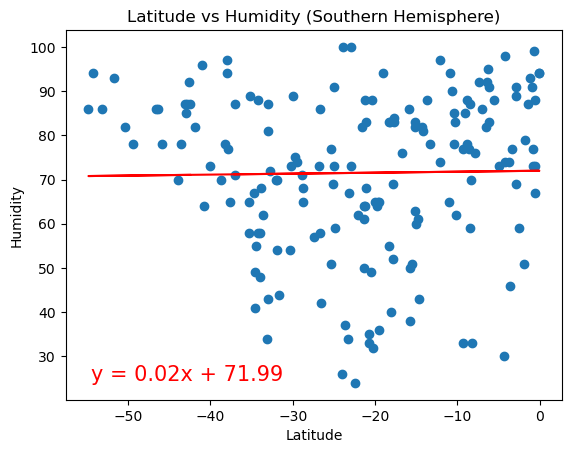

In [90]:
# Southern Hemisphere
 
x_s = Southern_hemisphere_df['Lat']
y_s = Southern_hemisphere_df['Humidity']
linear_regression_func_for_plotting(x_s, y_s, (0.05,0.05))
plt.title('Latitude vs Humidity (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:

From the graph we can see that both regression shows relatively weak relation bewteen the latitude and humidity across Northern and Southern hemisphere. The only difference between two hemisphere is in Northern, as the lat increase the humidity will slightly reduce. so negative correlation, but in southern as the lat increase the humidity will increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.00982336743697147 


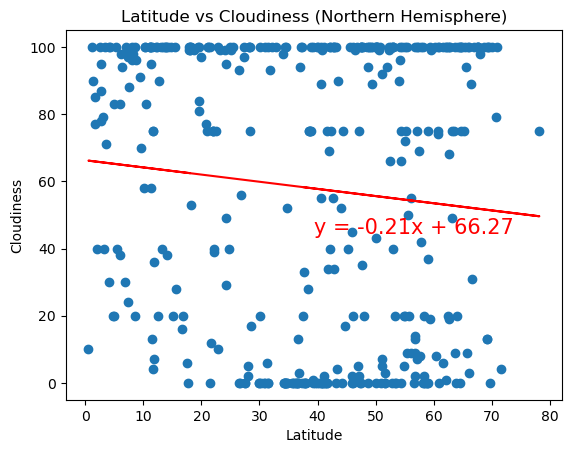

In [94]:
# Northern Hemisphere
 
x_n = Northern_hemisphere_df['Lat']
y_n = Northern_hemisphere_df['Cloudiness']
linear_regression_func_for_plotting(x_n, y_n, (0.5,0.45))
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r^2-value is: 0.004677438180190818 


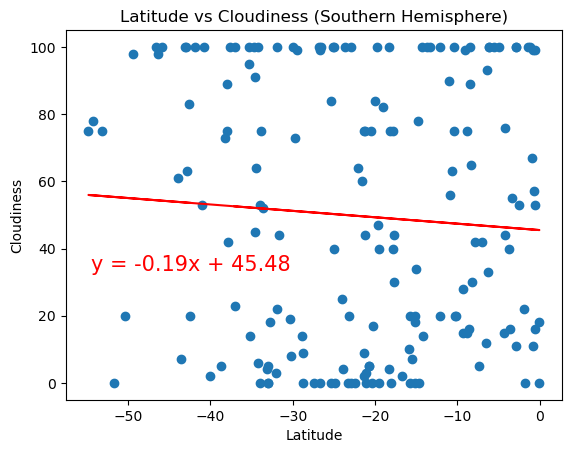

In [97]:
# Southern Hemisphere
 
x_s = Southern_hemisphere_df['Lat']
y_s = Southern_hemisphere_df['Cloudiness']
linear_regression_func_for_plotting(x_s, y_s, (0.05,0.35))
plt.title('Latitude vs Cloudiness (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:

So the scatters between cloudiness and latitude are quite dispersed. from the plot we can see that highly dispersed distribution 
across both Norhern and Southern hemisphere, the linear regression line draws very weak relationships between the dependent and
independent variable. However, it appears both hemisphere as the lat increase the cloudiness tend to decrease slightly.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.00013718620574896688 


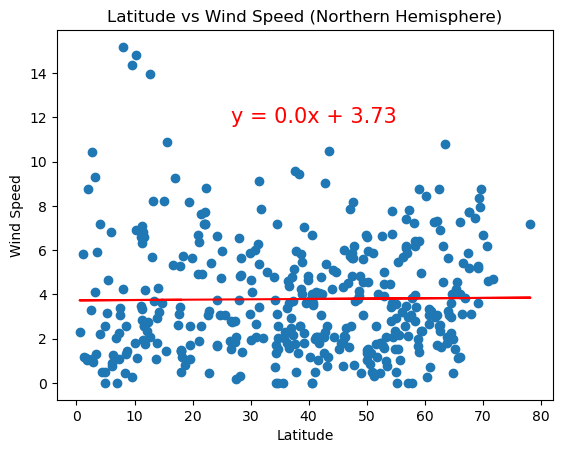

In [99]:
# Northern Hemisphere
 
x_n = Northern_hemisphere_df['Lat']
y_n = Northern_hemisphere_df['Wind Speed']
linear_regression_func_for_plotting(x_n, y_n, (0.35,0.75))
plt.title('Latitude vs Wind Speed (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r^2-value is: 0.005357773172005638 


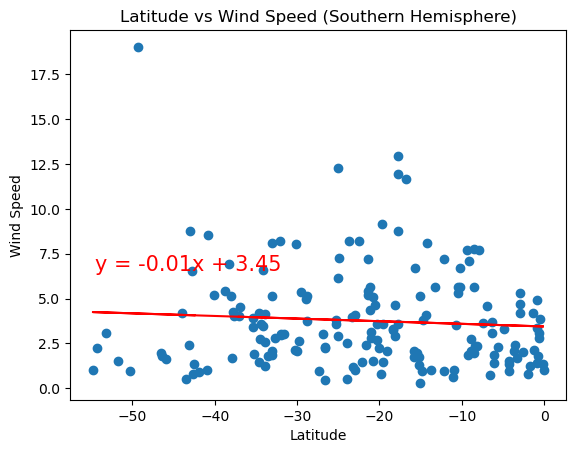

In [100]:
# Southern Hemisphere
 
x_s = Southern_hemisphere_df['Lat']
y_s = Southern_hemisphere_df['Wind Speed']
linear_regression_func_for_plotting(x_s, y_s, (0.05,0.35))
plt.title('Latitude vs Wind Speed (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:

From the graphs we can see that in Northern hemisphere the regression line slope is 0, and it has very small R squared value.
so basicaly means there are appears to be no relatioship between lat and wind speed. In Southern hemisphere, samiliarily,
very small R-squared value and very low slop. So this also indicates that no visible corealtions.